In [4]:
import pandas as pd
from datetime import datetime

In [5]:
detectores = pd.read_csv("Detectores.csv", sep=";")

In [6]:
det = detectores.drop(columns=['Comuna Nombre', 'Arco', 'Dato Tipo', 'ID Dato', 'Fecha Proyeccion', 'Flujo Proyeccion'])

In [7]:
det

,Ubicacion Contador,Codigo Contador,Fecha,HMS Conteo,Flujo
0,RADAL-ECUADOR,D008274,Jue.30-06-2022,23:00:00,71
1,ECUADOR-RADAL,D008271,Jue.30-06-2022,23:00:00,258
2,RADAL-ECUADOR,D008274,Jue.30-06-2022,22:45:00,63
3,ECUADOR-RADAL,D008271,Jue.30-06-2022,22:45:00,265
4,RADAL-ECUADOR,D008274,Jue.30-06-2022,22:30:00,72
...,...,...,...,...,...
5755,ECUADOR-RADAL,D008271,Vie.10-06-2022,23:15:00,164
5756,RADAL-ECUADOR,D008274,Vie.17-06-2022,23:15:00,61
5757,ECUADOR-RADAL,D008271,Vie.17-06-2022,23:15:00,304
5758,RADAL-ECUADOR,D008274,Vie.24-06-2022,23:15:00,50


In [8]:
det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Ubicacion Contador  5760 non-null   object
 1   Codigo Contador     5760 non-null   object
 2   Fecha               5760 non-null   object
 3   HMS Conteo          5760 non-null   object
 4   Flujo               5760 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 225.1+ KB


In [9]:
det['Fecha'] = det['Fecha'].str[-10:]

In [10]:
det

,Ubicacion Contador,Codigo Contador,Fecha,HMS Conteo,Flujo
0,RADAL-ECUADOR,D008274,30-06-2022,23:00:00,71
1,ECUADOR-RADAL,D008271,30-06-2022,23:00:00,258
2,RADAL-ECUADOR,D008274,30-06-2022,22:45:00,63
3,ECUADOR-RADAL,D008271,30-06-2022,22:45:00,265
4,RADAL-ECUADOR,D008274,30-06-2022,22:30:00,72
...,...,...,...,...,...
5755,ECUADOR-RADAL,D008271,10-06-2022,23:15:00,164
5756,RADAL-ECUADOR,D008274,17-06-2022,23:15:00,61
5757,ECUADOR-RADAL,D008271,17-06-2022,23:15:00,304
5758,RADAL-ECUADOR,D008274,24-06-2022,23:15:00,50


In [11]:
df = pd.to_datetime(det['Fecha'].astype(str) + ' ' + det['HMS Conteo'].astype(str), format="%d-%m-%Y %H:%M:%S")

In [136]:
df

0      2022-06-30 23:00:00
1      2022-06-30 23:00:00
2      2022-06-30 22:45:00
3      2022-06-30 22:45:00
4      2022-06-30 22:30:00
               ...        
5755   2022-06-10 23:15:00
5756   2022-06-17 23:15:00
5757   2022-06-17 23:15:00
5758   2022-06-24 23:15:00
5759   2022-06-24 23:15:00
Length: 5760, dtype: datetime64[ns]

In [12]:
det.insert(5, 'Timestamp', df)

In [13]:
det['Fecha'] = pd.to_datetime(det['Fecha'], format="%d-%m-%Y")

In [14]:
det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Ubicacion Contador  5760 non-null   object        
 1   Codigo Contador     5760 non-null   object        
 2   Fecha               5760 non-null   datetime64[ns]
 3   HMS Conteo          5760 non-null   object        
 4   Flujo               5760 non-null   int64         
 5   Timestamp           5760 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 270.1+ KB


In [15]:
det = det.drop(columns=["Fecha", "HMS Conteo"])

In [16]:
det.sort_values(by=['Timestamp'], inplace = True) 

In [17]:
er = det[det['Ubicacion Contador'] == 'ECUADOR-RADAL']
re = det[det['Ubicacion Contador'] == 'RADAL-ECUADOR']

In [18]:
er

,Ubicacion Contador,Codigo Contador,Flujo,Timestamp
5633,ECUADOR-RADAL,D008271,96,2022-06-01 00:00:00
5631,ECUADOR-RADAL,D008271,99,2022-06-01 00:15:00
5629,ECUADOR-RADAL,D008271,75,2022-06-01 00:30:00
5627,ECUADOR-RADAL,D008271,86,2022-06-01 00:45:00
5625,ECUADOR-RADAL,D008271,40,2022-06-01 01:00:00
...,...,...,...,...
3,ECUADOR-RADAL,D008271,265,2022-06-30 22:45:00
1,ECUADOR-RADAL,D008271,258,2022-06-30 23:00:00
5230,ECUADOR-RADAL,D008271,162,2022-06-30 23:15:00
5220,ECUADOR-RADAL,D008271,166,2022-06-30 23:30:00


In [3]:
re

NameError: name 're' is not defined

In [19]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Cantidad de Vehículos')

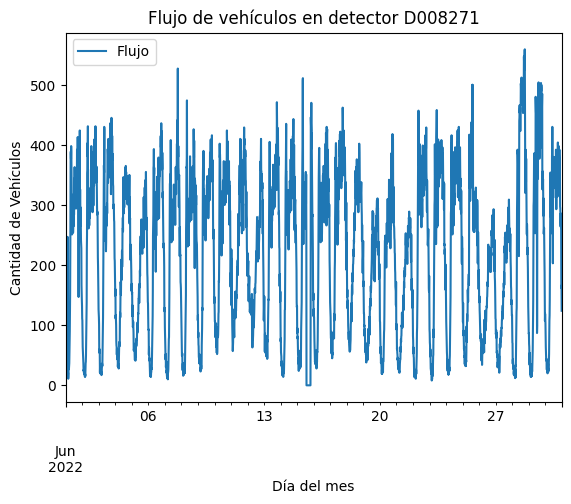

In [20]:
er.plot(kind='line', x='Timestamp', y='Flujo')
plt.title('Flujo de vehículos en detector D008271')
plt.xlabel('Día del mes')
plt.ylabel('Cantidad de Vehículos')

Text(0, 0.5, 'Cantidad de Vehículos')

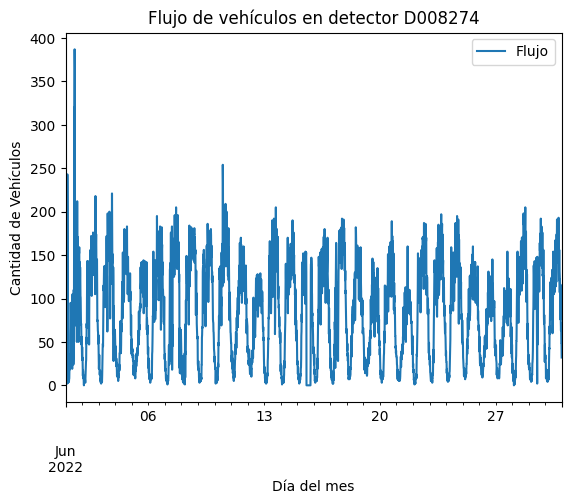

In [21]:
re.plot(kind='line', x='Timestamp', y='Flujo')
plt.title('Flujo de vehículos en detector D008274')
plt.xlabel('Día del mes')
plt.ylabel('Cantidad de Vehículos')

In [9]:
df = pd.DataFrame({
    'frame': [],
    'vehiculos': [],
    'peatones': [],
    'wait': [],
})

In [10]:
df

,frame,vehiculos,peatones,wait


In [20]:
file = open('Agustinas_12_labeled.txt')
frame = []
vehiculos = []
peatones = []
wait = []

for line in file:
    frame.append(int(file.readline().split(' ')[0]))
    vehiculos.append(int(file.readline().split(' ')[1]))
    peatones.append(int(file.readline().split(' ')[2]))
    wait.append(int(file.readline().split(' ')[3]))

df1 = pd.DataFrame({
    'frame': frame,
    'vehiculos': vehiculos,
    'peatones': peatones,
    'wait': wait,
})

ValueError: invalid literal for int() with base 10: ''

In [35]:
df = pd.read_csv('Agustinas_12_labeled.txt', delimiter=' ', index_col=False)

In [43]:
df.frame

0          1
1          2
2          3
3          4
4          5
        ... 
6556    6809
6557    6810
6558    6811
6559    6812
6560    6813
Name: frame, Length: 6561, dtype: int64

<AxesSubplot:title={'center':'Cantidad de vehículos'}, xlabel='frame', ylabel='n° de vehículos'>

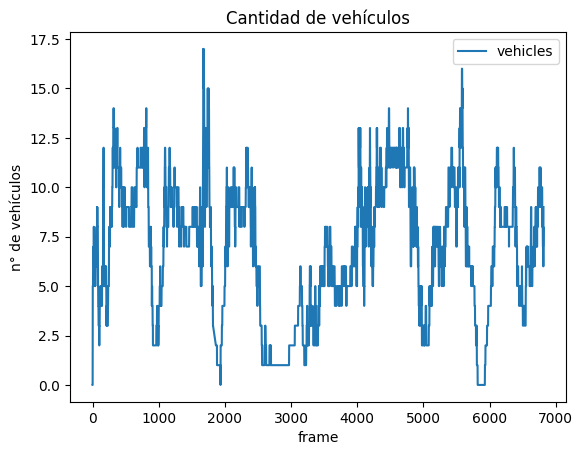

In [42]:
df.plot(x='frame', y='vehicles', kind='line', title='Cantidad de vehículos', ylabel='n° de vehículos')

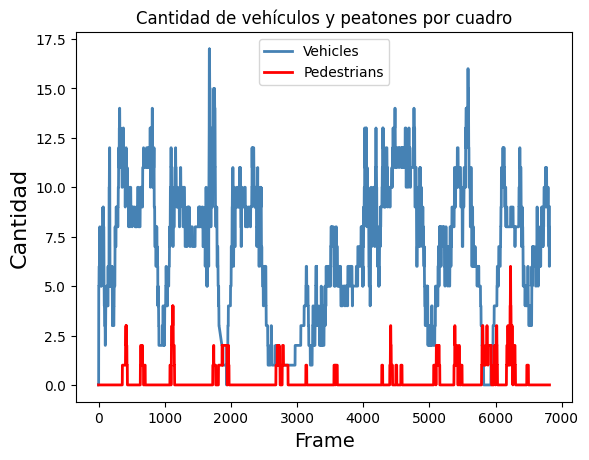

In [53]:
import matplotlib.pyplot as plt

#define colors to use
col1 = 'steelblue'
col2 = 'red'

#define subplots
fig,ax = plt.subplots()

#add first line to plot
ax.plot(df.frame, df.vehicles, color=col1, linewidth=2)
ax.set_title('Cantidad de vehículos y peatones por cuadro')

#add x-axis label
ax.set_xlabel('Frame', fontsize=14)

#add y-axis label
ax.set_ylabel('Cantidad', fontsize=16)

#define second y-axis that shares x-axis with current plot
#ax2 = ax.twinx()

#add second line to plot
ax.plot(df.frame, df.pedestrian, color=col2, linewidth=2)

ax.legend(['Vehicles', 'Pedestrians'])


#ax2.set_ylabel('Pedestrians', color=col2, fontsize=16)



In [1]:
#define subplots
fig,ax = plt.subplots()

#add first line to plot
ax.plot(df.frame, df.wait, linewidth=2)
ax.set_title('Espera acumulada por cuadro')

#add x-axis label
ax.set_xlabel('Frame', fontsize=14)

#add y-axis label
ax.set_ylabel('Cuadros de espera', fontsize=16)


#ax2.set_ylabel('Pedestrians', color=col2, fontsize=16)

NameError: name 'plt' is not defined